<a href="https://colab.research.google.com/github/kumar-sam/Job-Description-classification-BERT/blob/master/Classification_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from datetime import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report


In [ ]:
# TRAINING DATA
df = pd.read_csv('/Users/anchal.agarwalmroads.com/Downloads/dataset_jds3.csv')
data = pd.DataFrame(df)

# PRODUCTION DATA
test_data = pd.read_csv('/Users/anchal.agarwalmroads.com/Downloads/final_test.csv',encoding='latin-1')
data2 = pd.DataFrame(test_data)



In [ ]:
#data = data[['jd','label']]
data.head(3)
data.dtypes

label    object
TITLE    object
jd       object
dtype: object

In [ ]:
data.groupby(['label'])['label'].count()

label
NT    1645
T     1963
Name: label, dtype: int64

In [ ]:
print(data.label.value_counts())
print(data2.label.value_counts())

T     1963
NT    1645
Name: label, dtype: int64
T     31
NT    18
Name: label, dtype: int64


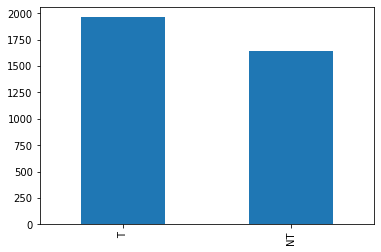

In [ ]:
data.label.value_counts().plot(kind='bar')

In [ ]:
#Y Encoding

le = LabelEncoder()

#training data
X = data.jd
y = data.label
y_encode = LabelEncoder().fit_transform(y)
#print(y)

#production data
x_test = data2.JD
y_test = data2.label
#print(y_test)
y_test_encode = LabelEncoder().fit_transform(y_test)

print(y_test_encode)
print(y_encode)



[1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 1 1 1]
[1 1 1 ... 0 0 0]


In [ ]:
#Making our texts into vectores

vectorizer = CountVectorizer()
X_vector = vectorizer.fit(X)
x_test_vector = vectorizer.fit(x_test)
#print(X.toarray())
#bow_transformer = CountVectorizer.fit(X)
#print(len(X_vector.vocabulary_))

text =data['jd'][3]
#print(text)
bow4 = vectorizer.transform([text])
print(bow4)
print(bow4.shape)

  (0, 185)	1
  (0, 260)	1
  (0, 273)	2
  (0, 318)	1
  (0, 330)	7
  (0, 380)	1
  (0, 405)	1
  (0, 446)	1
  (0, 457)	1
  (0, 463)	1
  (0, 529)	1
  (0, 552)	1
  (0, 596)	1
  (0, 619)	1
  (0, 689)	1
  (0, 690)	1
  (0, 719)	1
  (0, 746)	1
  (0, 791)	1
  (0, 799)	1
  (0, 825)	1
  (0, 853)	1
  (0, 862)	1
  (0, 877)	1
  (0, 887)	1
  :	:
  (0, 1835)	1
  (0, 1949)	1
  (0, 1958)	1
  (0, 2092)	1
  (0, 2145)	3
  (0, 2160)	1
  (0, 2161)	2
  (0, 2241)	1
  (0, 2242)	1
  (0, 2244)	1
  (0, 2280)	2
  (0, 2285)	1
  (0, 2286)	2
  (0, 2288)	2
  (0, 2315)	1
  (0, 2340)	1
  (0, 2370)	1
  (0, 2394)	2
  (0, 2397)	1
  (0, 2398)	1
  (0, 2421)	1
  (0, 2423)	1
  (0, 2509)	3
  (0, 2516)	1
  (0, 2528)	1
(1, 2535)


In [ ]:
print(vectorizer.get_feature_names()[2528])

years


In [ ]:
X_transform = X_vector.transform(X)
x_test_transform = x_test_vector.transform(x_test)
print('Shape of Sparse Matrix: ', X_transform.shape)
print('Amount of Non-Zero occurences: ', X_transform.nnz)

print('Shape of Sparse Matrix: ', x_test_transform.shape)
print('Amount of Non-Zero occurences: ', x_test_transform.nnz)

Shape of Sparse Matrix:  (3608, 2535)
Amount of Non-Zero occurences:  358187
Shape of Sparse Matrix:  (49, 2535)
Amount of Non-Zero occurences:  6979


In [ ]:
sparsity = (100.0 * X_transform.nnz / (X_transform.shape[0] * X_transform.shape[1]))
sparsity_test = (100.0 * x_test_transform.nnz / (x_test_transform.shape[0] * x_test_transform.shape[1]))

print('sparsity: {}'.format((sparsity)))
print('sparsity: {}'.format((sparsity_test)))

sparsity: 3.91620418355878
sparsity: 5.618484080022542


In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(X_transform)
X_tfidf = tfidf_transformer.transform(X_transform)
print(X_tfidf)

tfidf_transformer_test = TfidfTransformer().fit(x_test_transform)
X_tfidf_test = tfidf_transformer_test.transform(x_test_transform)

  (0, 2528)	0.03378011331662994
  (0, 2509)	0.09486047028583089
  (0, 2507)	0.05540624872801844
  (0, 2505)	0.05230841403584499
  (0, 2463)	0.12110011884143071
  (0, 2452)	0.053567753419796915
  (0, 2417)	0.04807326713908808
  (0, 2413)	0.06018056188026199
  (0, 2398)	0.05606490818584101
  (0, 2376)	0.23783545841760473
  (0, 2291)	0.13621467665697953
  (0, 2241)	0.042943054490774776
  (0, 2211)	0.12417643609372533
  (0, 2191)	0.04910494949849016
  (0, 2149)	0.16581550827852073
  (0, 2141)	0.22471725322188568
  (0, 2128)	0.03171512946262356
  (0, 2093)	0.05449466821391647
  (0, 2085)	0.04292713211138478
  (0, 2081)	0.08730565640880607
  (0, 2061)	0.060749747803798784
  (0, 2052)	0.06085814420400936
  (0, 2036)	0.22528924186066293
  (0, 2014)	0.0653468918495017
  (0, 1992)	0.05683425275606031
  :	:
  (3607, 665)	0.05105004752608966
  (3607, 648)	0.044336176243459154
  (3607, 622)	0.04907354927455906
  (3607, 611)	0.183559552230008
  (3607, 602)	0.06746853474684306
  (3607, 585)	0.0496970

In [ ]:
# Run algorithms using 10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y_encode, test_size=0.3, random_state = 42)
seedNum = 777
num_folds = 10
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
#models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
#models.append(('NB', GaussianNB()))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', SVC(random_state=seedNum)))
#models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
#models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
#models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))


/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/py

LR: 0.878816 (0.023828)
Model training time: 0:00:00.424116


/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

RF: 0.845569 (0.019291)
Model training time: 0:00:01.779935
Average metrics (accuracy) from all models: 0.8621925779534475


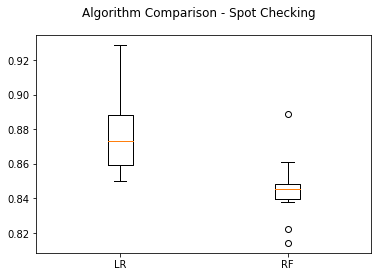

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
# Hyperparameter tuning with with best model - Logistics Reg
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
C_param_range = [0.001,0.01,0.1,1,10,100,7.74]
    
hyperparameters = dict(C=C_param_range, penalty=penalty)
kfold=KFold(n_splits=10,random_state=777)
LR = GridSearchCV(LogisticRegression(), hyperparameters, cv=kfold, verbose=0)
LR.fit(X_train,y_train)
print(LR.best_score_)
print(LR.best_params_)
print(LR.best_estimator_)

# RF
n_estimators=range(100,1000,100)
hyper2={'n_estimators':n_estimators}
kfold=KFold(n_splits=10,random_state=777)
RF=GridSearchCV(estimator=RandomForestClassifier(random_state=777),param_grid=hyper2,verbose=True,cv=kfold)
RF.fit(X_train,y_train)
print(RF.best_score_)
print(RF.best_params_)
print(RF.best_estimator_)

/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/py

0.8788118811881188
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/py

In Sample Score:  0.9231683168316832


/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/py

validation score:  [0.88118812 0.86336634 0.92277228 0.87920792 0.86930693]


/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/anchal.agarwalmroads.com/opt/anaconda3/lib/py

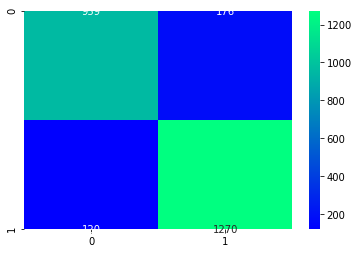

In [ ]:
# Fitting Logistic Regression

model=LogisticRegression(random_state=777,C=1,penalty='l2')
model.fit(X_train, y_train)
print('In Sample Score: ', model.score(X_train, y_train))
val_score=cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('validation score: ',val_score)
result=cross_val_predict(model,X_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()


In [ ]:
#CHECKING MODEL ACCURACY

# Predicting the Test and Training set results - wothout k fold
y_pred1_f = model.predict(X_test)
y_pred2_f = model.predict(X_train)
y_pred3_f = model.predict (X_tfidf_test.toarray())
#print(y_pred3_f)

# Making the Confusion Matrix for Test and Training set results
cm1_f = confusion_matrix(y_test, y_pred1_f)
cm2_f = confusion_matrix(y_train, y_pred2_f)
cm3_f = confusion_matrix(y_test_encode, y_pred3_f)
cm1_f
cm2_f
cm3_f

#Recall, precision and accuracy for Test and Training set results
c1_f=classification_report(y_test, y_pred1_f)
c2_f=classification_report(y_train, y_pred2_f)
c3_f=classification_report(y_test_encode, y_pred3_f)

#Accuracy Score
a1_f=accuracy_score(y_test, y_pred1_f)
a2_f=accuracy_score(y_train, y_pred2_f)
a3_f=accuracy_score(y_test_encode, y_pred3_f)
print("Validation set:", cm1_f)
print("Training set:",cm2_f)
print("Test set:",cm3_f)
print("Validation set:",c1_f)
print("Training set:",c2_f)
print("Test set:",c3_f)
print("Validation set:",a1_f)
print("Training set:",a2_f)
print("Test prod set:",a3_f)

Validation set: [[422  88]
 [ 45 528]]
Training set: [[1007  128]
 [  66 1324]]
Test set: [[17  1]
 [12 19]]
Validation set:               precision    recall  f1-score   support

           0       0.90      0.83      0.86       510
           1       0.86      0.92      0.89       573

    accuracy                           0.88      1083
   macro avg       0.88      0.87      0.88      1083
weighted avg       0.88      0.88      0.88      1083

Training set:               precision    recall  f1-score   support

           0       0.94      0.89      0.91      1135
           1       0.91      0.95      0.93      1390

    accuracy                           0.92      2525
   macro avg       0.93      0.92      0.92      2525
weighted avg       0.92      0.92      0.92      2525

Test set:               precision    recall  f1-score   support

           0       0.59      0.94      0.72        18
           1       0.95      0.61      0.75        31

    accuracy                     

In [ ]:
pred_proba_df = pd.DataFrame(model.predict_proba(X_tfidf_test.toarray()))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test_encode.as_matrix().reshape(y_test_encode.as_matrix().size,1),
                                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test_encode.as_matrix().reshape(y_test_encode.as_matrix().size,1),
                           Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1)))
    print(classification_report(y_test_encode, pred_proba_df))


******** For i = 0.05 ******


AttributeError: 'numpy.ndarray' object has no attribute 'as_matrix'

(0, 1)

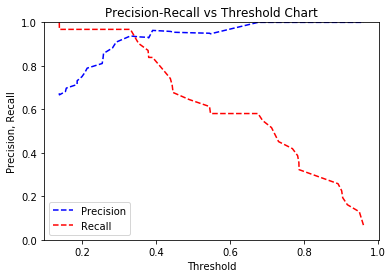

In [ ]:
### Predict test_y values and probabilities based on fitted logistic regression model
pred_y=model.predict(X_tfidf_test.toarray()) 
probs_y=model.predict_proba(X_tfidf_test.toarray()) 

# probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
precision, recall, thresholds = precision_recall_curve(y_test_encode, probs_y[:, 1]) 

#retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
#clf = LogisticRegression(class_weight="unbalanced")
#clf.fit(X_train, y_train)
THRESHOLD = 0.30
preds = np.where(model.predict_proba(X_tfidf_test.toarray())[:,1] > THRESHOLD, 1, 0)
print(preds)

pd.DataFrame(data=[accuracy_score(y_test_encode, preds), recall_score(y_test_encode, preds),precision_score(y_test_encode, preds), roc_auc_score(y_test_encode, preds)], index=["accuracy", "recall", "precision", "roc_auc_score"])

print('Confusion Matrix')
print(confusion_matrix(y_test_encode,preds))


[1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 1 1 1]
Confusion Matrix
[[16  2]
 [ 1 30]]


In [ ]:
data2['predicted label'] = preds
data2['actual label'] = y_test_encode

In [ ]:
data2.head()

,JD,label,predicted result,predicted label,actual label
0,security administration and administration ma...,T,0,1,1
1,you will be the 1st point of contact from the...,NT,0,0,0
2,manage all accounting operations including bi...,NT,0,0,0
3,we are growing and taking on more to make the...,NT,0,0,0
4,role overview the management & strategy team ...,NT,0,0,0


In [ ]:
data2.to_csv('output_logistic_reg.csv')